# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
# import urllib


## update data folder as necessary
# u = urllib.URLopener()
## change the url below to include your own auth token from github
# u.retrieve("https://raw.githubusercontent.com/MIDS-W207/coursework/master/Data/mushroom.map?token=AH1Id0JxYBAcPP-FOnpKmaDuicIBO-pzks5XnjemwA%3D%3D", 
#            "mushroom.map")

feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

('Loaded feature names:', 126)


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

((7000L, 126L), (1124L, 126L))


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [4]:
import time
def P1():
### STUDENT START ###
    K = np.arange(1, 51, 1)
    
    print("k:     Fractional variance explained:")
    for k in K:
        pca = PCA(n_components=k)
        pca.fit(train_data)
        print("%2s %18s" % (k, np.sum(pca.explained_variance_ratio_)))
        time.sleep(0.25)
### STUDENT END ###

P1()

k:     Fractional variance explained:
 1     0.164043312793
 2     0.297278101488
 3     0.399012666709
 4     0.469646231059
 5     0.508312694566
 6     0.545120737641
 7     0.576403128668
 8     0.603740502195
 9     0.629905406884
10     0.652214832563
11     0.672696562099
12      0.69137986869
13      0.70872408902
14     0.725567695477
15     0.740755883424
16     0.755842067705
17     0.770133402741
18     0.784253529053
19     0.797503976447
20     0.808967765956
21     0.819678424424
22     0.830335890867
23     0.840745562597
24     0.850682547861
25     0.859763246507
26      0.86845650881
27     0.876412676165
28     0.884170921684
29     0.891546618434
30     0.898549378056
31     0.904961709568
32     0.911106843895
33     0.916830293864
34     0.922166582936
35     0.927425943815
36     0.932452686012
37     0.937443104213
38     0.942002524378
39      0.94653036284
40     0.950928240603
41     0.955123130561
42     0.959100152019
43      0.96280057719
44     0.9663958

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

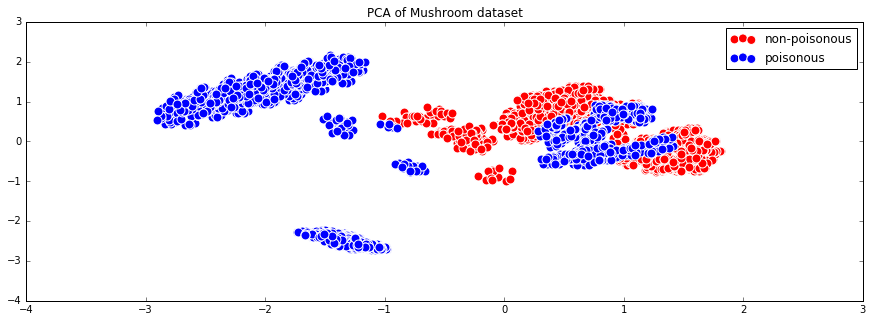

In [5]:
def P2():
### STUDENT START ###
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    
    plt.figure(figsize=(15, 5))
    for c, i, train_label in zip("rb", [0, 1], ["non-poisonous", "poisonous"]):
        plt.scatter(train_transform[train_labels == i, 0], 
                    train_transform[train_labels == i, 1], 
                    s=80, edgecolors='w', facecolors=c, label=train_label)
    plt.legend()
    plt.title("PCA of Mushroom dataset")

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

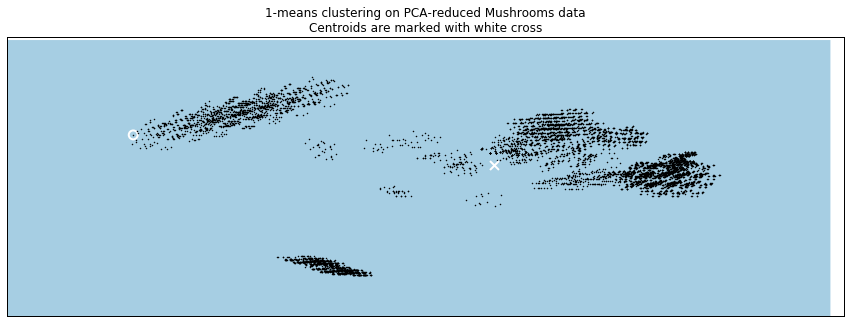

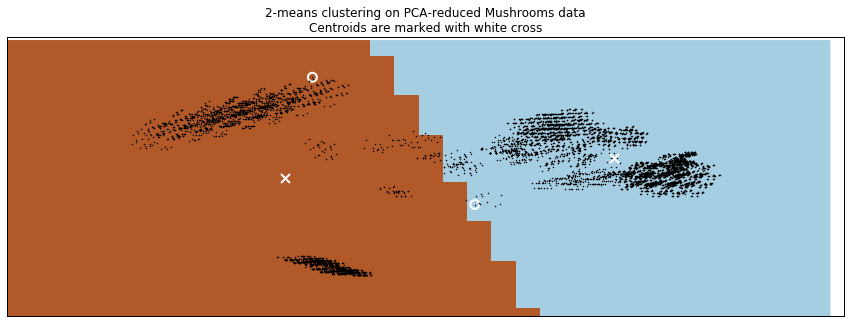

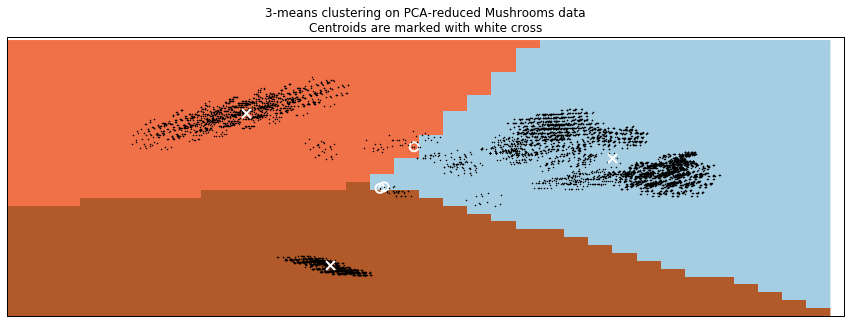

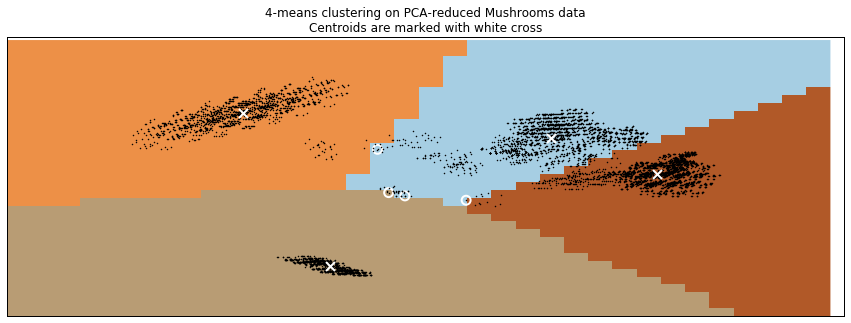

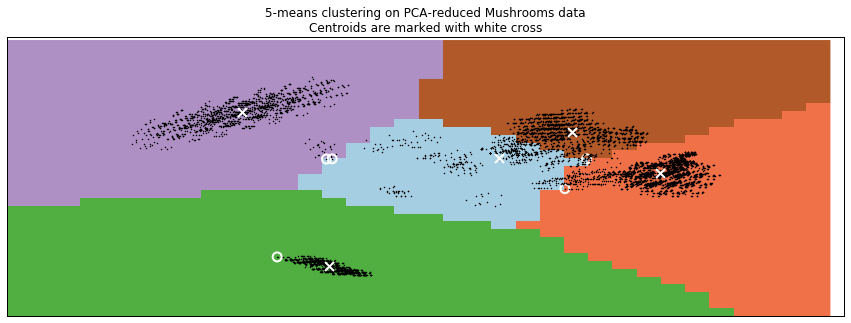

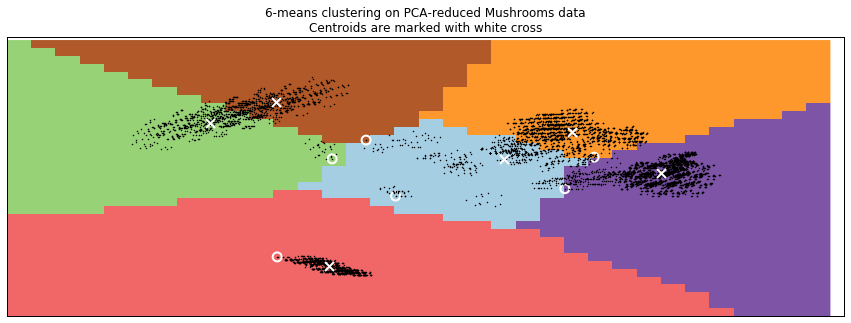

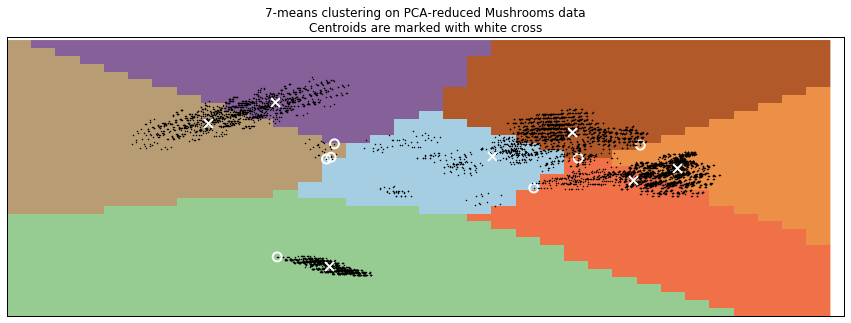

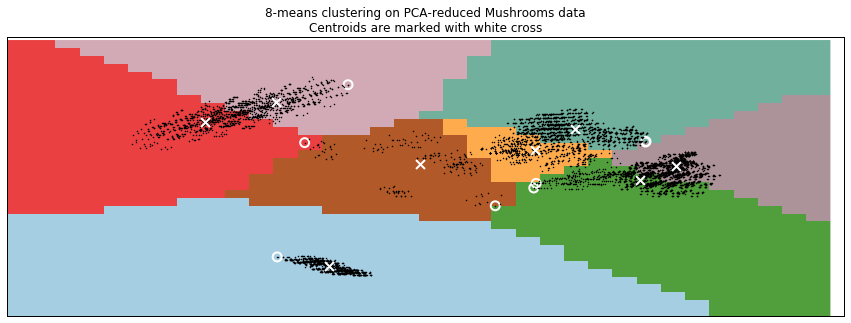

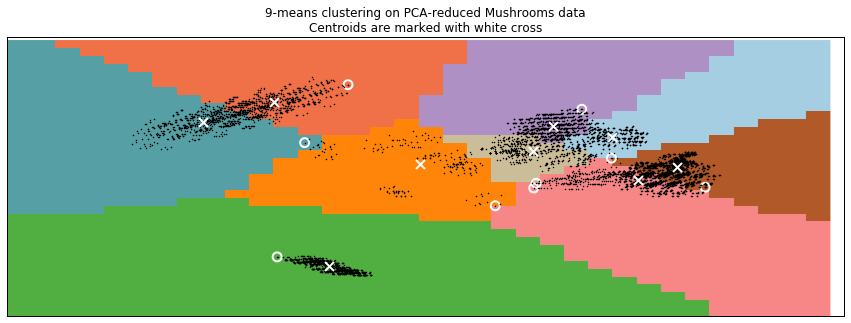

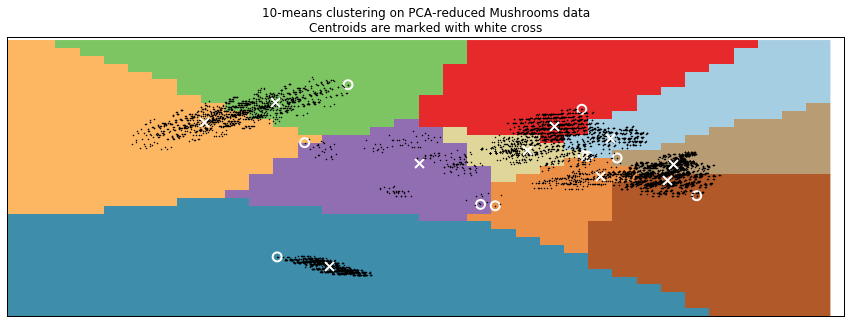

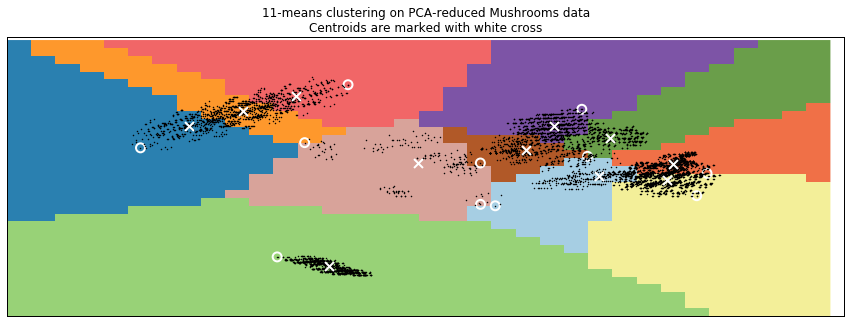

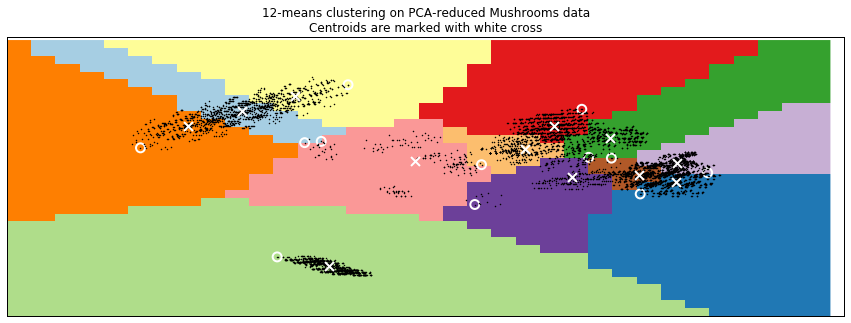

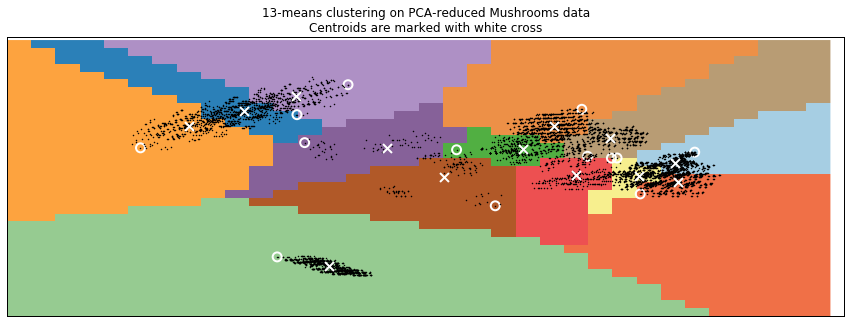

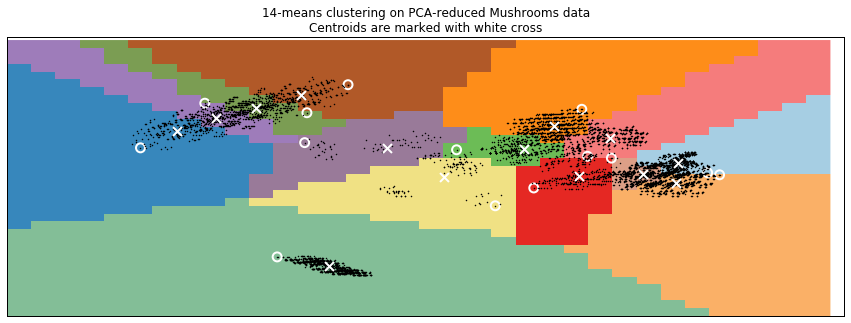

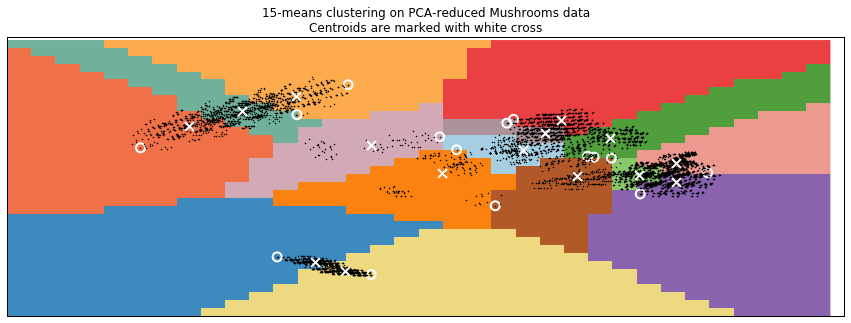

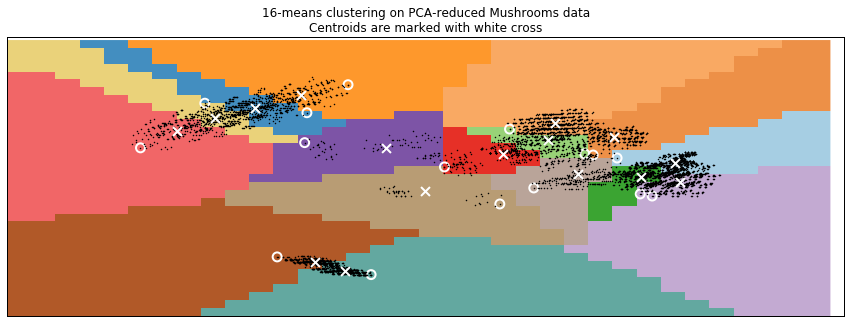

In [6]:
def P3():
### STUDENT START ###    
    clusters = np.arange(1, 17, 1) # 16 clusters
    
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    
    
    # REFERENCE: See sklearn docs for the plot generation code mostly taken below:
    # http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    
    h = 0.2 # step size of the mesh
    
    for c in clusters:
        km = KMeans(init="k-means++", n_clusters=c)
        km.fit(train_transform)
        
        x_min, x_max = train_transform[:, 0].min() - 1, train_transform[:, 0].max() + 1 
        y_min, y_max = train_transform[:, 1].min() - 1, train_transform[:, 1].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(15, 5))
        plt.clf()
        plt.imshow(Z, interpolation='nearest', 
                  extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
                  cmap=plt.cm.Paired, 
                  aspect='auto', origin='lower')
        plt.plot(train_transform[:, 0], train_transform[:, 1], 'k.', markersize=2)
        
        centroids = km.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=80, linewidths=2,
                    color='w', zorder=10)
        
        # plot circles for most distant points from the centroids for each cluster
        distances = km.transform(train_transform)
        max_dist = []
        
        # iterate over each cluster distances
        for i in range(distances.shape[1]):
            this_labels = np.where(km.labels_ == i) # indexes of values in this cluster
            max_dist_index = np.where(distances[:, i]==np.max(distances[this_labels, i]))[0][0] 
            max_dist.append(train_transform[max_dist_index])
        
        plt.scatter(zip(*max_dist)[0], zip(*max_dist)[1],
            facecolors='none', s=80, edgecolors='w', linewidths=2)
        
        plt.title('%s-means clustering on PCA-reduced Mushrooms data\n'
                  'Centroids are marked with white cross' % (c))
        
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

C:\Anaconda2\lib\site-packages\matplotlib\contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


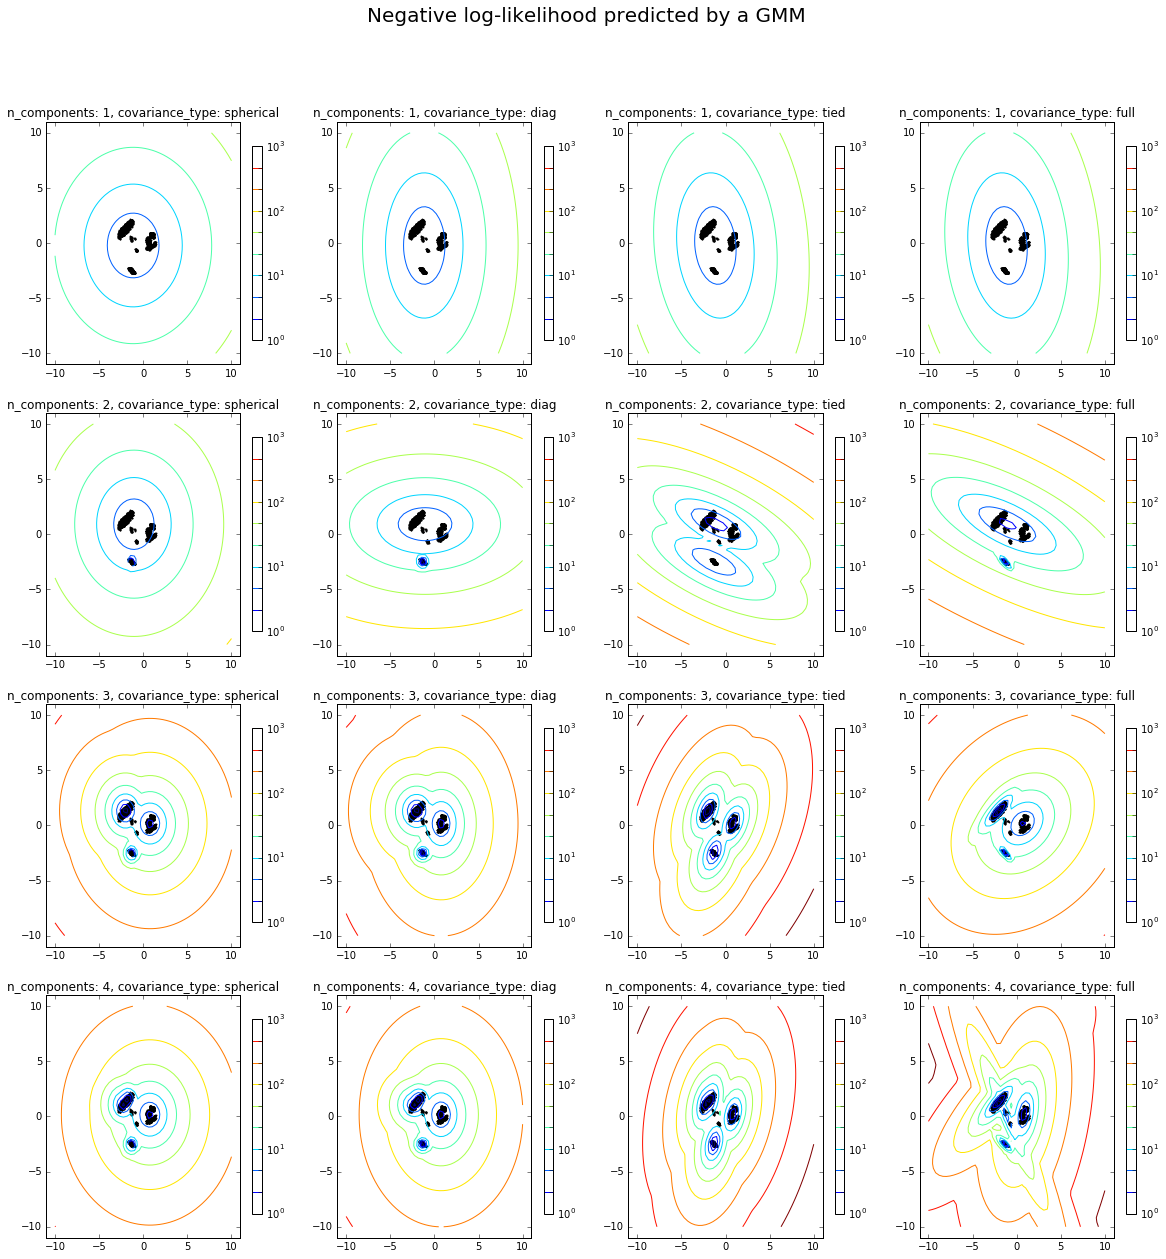

In [7]:
def P4():
### STUDENT START ###
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    
    # separate out positive (label==1) mushrooms
    positive_train = train_transform[np.where(train_labels==1)] 
    positive_train_labels = train_labels[np.where(train_labels==1)]
    
    components = np.arange(1, 5, 1)
    covariance = ["spherical", "diag", "tied", "full"]
    
    plt.figure(figsize=(20, 20))
    p = 1
    for com, cov in [(com,cov) for com in components for cov in covariance]:

        gmm = GMM(n_components=com, covariance_type=cov)
        gmm.fit(positive_train)

        # create the contour plot
        x, y = np.linspace(-10.0, 10.0), np.linspace(-10.0, 10.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)[0]
        Z = Z.reshape(X.shape)
        
        plt.subplot(4, 4, p)
        p += 1
        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(positive_train[:, 0], positive_train[:, 1], .8)
        plt.title('n_components: %s, covariance_type: %s' % (com, cov))

    plt.suptitle('Negative log-likelihood predicted by a GMM', size=20)
    plt.show()

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [8]:
def P5():
### STUDENT START ###
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    test_transform = pca.transform(test_data)
    
    # separate out positive (label==1) and negative (label==0) mushrooms
    positive_train = train_transform[np.where(train_labels==1)] 
    negative_train = train_transform[np.where(train_labels==0)]
        
    gmm_positive = GMM(n_components=4, covariance_type='full')
    gmm_positive.fit(positive_train)
    
    gmm_negative = GMM(n_components=4, covariance_type='full')
    gmm_negative.fit(negative_train)
    
    pos_scores = gmm_positive.score(test_transform)
    neg_scores = gmm_negative.score(test_transform)
    
    # predict labels based on log probabilities from GMM models
    pred_labels = [1 if pos_scores[i] > neg_scores[i] else 0 for (i, d) in enumerate(test_transform)]
    
    score = [1 for (i, d) in enumerate(pred_labels) if pred_labels[i] == test_labels[i]]
    
    print("Test Accuracy: %s" % (float(len(score))/len(pred_labels)))

### STUDENT END ###

P5()

print("Wow! that is insanely accurate.")

Test Accuracy: 0.951067615658
Wow! that is insanely accurate.


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [9]:
def P6():
### STUDENT START ###
    p_components = np.arange(1, 5, 1)  
    g_components = np.arange(1, 4, 1)
    covariance = ["spherical", "diag", "tied", "full"]
    
    best_accuracy = 0
    best_gmm = None
    for pcom in p_components:
        pca = PCA(n_components=pcom)
        train_transform = pca.fit_transform(train_data)
        test_transform = pca.transform(test_data)
        for gcom, cov in [(gcom,cov) for gcom in g_components for cov in covariance]:
            gmm = GMM(n_components=gcom, covariance_type=cov)
            gmm.fit(train_transform)
            
            test_preds = gmm.predict(test_transform)
            accuracy = np.mean(test_preds.ravel() == test_labels.ravel()) * 100
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_gmm = gmm

    print("Best Test accuracy: %s\n" % (best_accuracy))
    print("Best gmm classifier: \n%s" % (gmm))

### STUDENT END ###

P6()

Best Test accuracy: 89.3238434164

Best gmm classifier: 
GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [10]:
# Might as well try the positive negative approach from P5
def P6_PosNeg():
    p_components = np.arange(1, 5, 1)  
    g_components = np.arange(1, 4, 1)
    covariance = ["spherical", "diag", "tied", "full"]
    
    best_accuracy = 0
    best_gmm = None
    for pcom in p_components:
        pca = PCA(n_components=pcom)
        train_transform = pca.fit_transform(train_data)
        test_transform = pca.transform(test_data)
        
        positive_train = train_transform[np.where(train_labels==1)] 
        negative_train = train_transform[np.where(train_labels==0)]
        
        for gcom, cov in [(gcom,cov) for gcom in g_components for cov in covariance]:
            gmm_positive = GMM(n_components=gcom, covariance_type=cov)
            gmm_positive.fit(positive_train)

            gmm_negative = GMM(n_components=gcom, covariance_type=cov)
            gmm_negative.fit(negative_train)
            
            pos_scores = gmm_positive.score(test_transform)
            neg_scores = gmm_negative.score(test_transform)
            
            pred_labels = [1 if pos_scores[i] > neg_scores[i] else 0 for (i, d) in enumerate(test_transform)]
            pred_labels = np.asarray(pred_labels)
            accuracy = np.mean(pred_labels.ravel() == test_labels.ravel()) * 100
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_gmm = gmm_positive

    print("Best Test accuracy: %s\n" % (best_accuracy))
    print("Best gmm classifier: \n%s" % (gmm_positive))    
    
    
P6_PosNeg()

print("\nMuch better accuracy!")

Best Test accuracy: 96.7971530249

Best gmm classifier: 
GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Much better accuracy!
